<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/machine-learning-and-data-science/blob/main/labe_birth1_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/labe_births_2010.xlsx - Sheet1.csv")

In [3]:
data.head()

,mothers_age,wt_gain,preg_htn,del_method,gest_age,birth_wt,female
0,20,20,2,2,39,3458,1
1,24,30,2,1,37,3175,1
2,33,45,2,1,39,4256,1
3,24,5,2,1,40,3572,0
4,20,53,2,1,40,3316,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   mothers_age  1000 non-null   int64
 1   wt_gain      1000 non-null   int64
 2   preg_htn     1000 non-null   int64
 3   del_method   1000 non-null   int64
 4   gest_age     1000 non-null   int64
 5   birth_wt     1000 non-null   int64
 6   female       1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [5]:
data.describe()

,mothers_age,wt_gain,preg_htn,del_method,gest_age,birth_wt,female
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.713000,34.422000,2.012000,1.355000,38.515000,3232.295000,0.475000
std,6.141364,21.506614,0.616633,0.673371,3.836991,641.871404,0.499624
min,15.000000,0.000000,1.000000,1.000000,22.000000,397.000000,0.000000
25%,23.000000,21.000000,2.000000,1.000000,38.000000,2930.000000,0.000000
50%,28.000000,30.000000,2.000000,1.000000,39.000000,3289.000000,0.000000
75%,32.000000,41.000000,2.000000,2.000000,40.000000,3606.250000,1.000000
max,47.000000,99.000000,9.000000,9.000000,99.000000,5216.000000,1.000000


Weight gain varies significantly, from 0 kg to a maximum of 98 kg (99 == unknown value). This wide range suggests individual differences in weight gain patterns.


In [6]:
data.loc[data['wt_gain'] != 99]["wt_gain"].sort_values(ascending=False)[:1]

,wt_gain
394,98


The value of preg_htn is 2 (no hypertension) at 25%, 50% and 75% as well. This means most of the females have no hypertension.

Further, if hypertension variable is classified yes or no using a statistical or predictive model, as there is class imbalance - SMOTE or other sampling method should be used to balance the class distributions.

In [7]:
data['preg_htn'].value_counts()

,count
preg_htn,
2,956
1,37
9,7


Similarily, most of the females have delivered the babies through method 1 (vaginal)

In [8]:
# Check for specific values indicating missing or unknown data
missing_values = data[(data['preg_htn'] == 9) | (data['wt_gain'] == 99) | (data['mothers_age'] == 99) | (data['birth_wt'] == 9999) | (data['gest_age'] == 99) | (data['del_method'] == 9)]
missing_values.head()

,mothers_age,wt_gain,preg_htn,del_method,gest_age,birth_wt,female
24,19,99,2,1,35,2041,0
41,37,99,2,1,38,3969,0
57,34,99,2,2,37,3260,0
71,32,99,2,1,35,2353,0
80,24,99,2,2,38,3595,0


In [9]:
len(missing_values) #length of missing values

68

Lets check the percentage of missing values.

In [10]:
import pandas as pd

# Define the missing value indicators for each variable
missing_indicators = {
    'preg_htn': 9,
    'wt_gain': 99,
    'mothers_age': 99,
    'birth_wt': 9999,
    'gest_age': 99,
    'del_method': 9
}

# Calculate the percentage of missing values for each variable
total_rows = len(data)
missing_percentages = {}

for column, missing_value in missing_indicators.items():
    missing_count = data[data[column] == missing_value].shape[0]
    missing_percentage = (missing_count / total_rows)
    missing_percentages[column] = missing_percentage

print(missing_percentages)

{'preg_htn': 0.007, 'wt_gain': 0.059, 'mothers_age': 0.0, 'birth_wt': 0.0, 'gest_age': 0.002, 'del_method': 0.004}


Given that you have a relatively small dataset of 1000 rows and only 68 rows contain missing values (less than 7%), and missing percentage of each row is very little, removing those rows might be a reasonable approach. This method is straightforward and doesn't introduce potential bias from imputation.

In [11]:
# Drop rows with missing values
data_cleaned = data.drop(missing_values.index)

In [12]:
len(data_cleaned)

932

In [13]:
#Drop duplicates
data_cleaned.drop_duplicates(inplace=True)

In [14]:
len(data_cleaned)

932

In [15]:
data_cleaned.columns

Index(['mothers_age', 'wt_gain', 'preg_htn', 'del_method', 'gest_age',
       'birth_wt', 'female'],
      dtype='object')

In [16]:
# Assuming you have a DataFrame named 'data'

# Convert categorical columns to categorical data type
data_cleaned['preg_htn'] = data_cleaned['preg_htn'].astype('object')
data_cleaned['female'] = data_cleaned['female'].astype('object')
data_cleaned['del_method'] = data_cleaned['del_method'].astype('object')

# Map numerical codes to categorical labels (if desired)
data_cleaned['preg_htn'] = data_cleaned['preg_htn'].replace({1: 'Yes', 2: 'No'})
data_cleaned['female'] = data_cleaned['female'].replace({0: 'Male', 1: 'Female'})
data_cleaned['del_method'] = data_cleaned['del_method'].replace({1: 'Vaginal', 2: 'C-Section'})

In [17]:
data_cleaned.head()

,mothers_age,wt_gain,preg_htn,del_method,gest_age,birth_wt,female
0,20,20,No,C-Section,39,3458,Female
1,24,30,No,Vaginal,37,3175,Female
2,33,45,No,Vaginal,39,4256,Female
3,24,5,No,Vaginal,40,3572,Male
4,20,53,No,Vaginal,40,3316,Male


In [18]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mothers_age  932 non-null    int64 
 1   wt_gain      932 non-null    int64 
 2   preg_htn     932 non-null    object
 3   del_method   932 non-null    object
 4   gest_age     932 non-null    int64 
 5   birth_wt     932 non-null    int64 
 6   female       932 non-null    object
dtypes: int64(4), object(3)
memory usage: 58.2+ KB


In [19]:
numerical_data = data_cleaned.select_dtypes(include=['number'])
numerical_data.head()

,mothers_age,wt_gain,gest_age,birth_wt
0,20,20,39,3458
1,24,30,37,3175
2,33,45,39,4256
3,24,5,40,3572
4,20,53,40,3316


In [20]:
categorical_data = data_cleaned.select_dtypes(include=['object'])
categorical_data.head()

,preg_htn,del_method,female
0,No,C-Section,Female
1,No,Vaginal,Female
2,No,Vaginal,Female
3,No,Vaginal,Male
4,No,Vaginal,Male


In [21]:
#check for categorical unique values
for col in categorical_data.columns:
  print(col, categorical_data[col].unique())

preg_htn ['No' 'Yes']
del_method ['C-Section' 'Vaginal']
female ['Female' 'Male']


In [22]:
import numpy as np
from scipy import stats

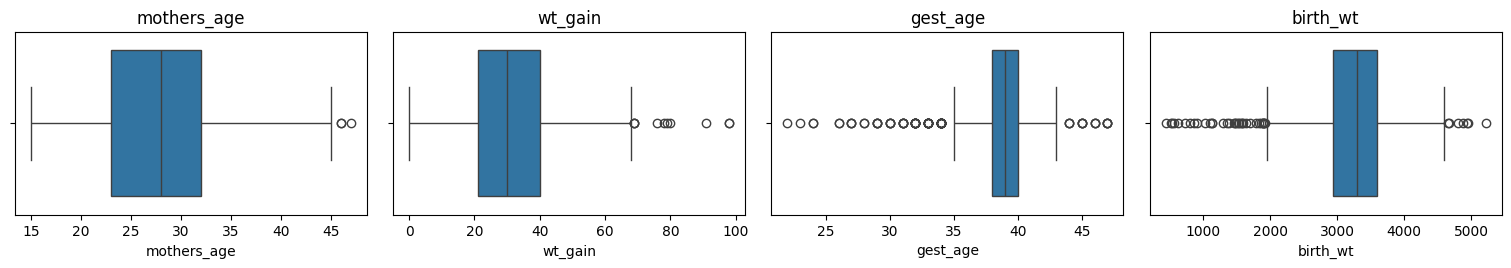

In [23]:
#converting to categorical data
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with specified dimensions
plt.figure(figsize=(19, 12))

# Iterate over numerical columns and plot box plots
for i, c in enumerate(numerical_data.columns):
    plt.subplot(5, 5, i+1)  # Adjust subplot index as needed
    sns.boxplot(x=numerical_data[c])
    plt.title(c)  # Add title for better readability

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Above box plot indicates that all the numerical columns in the data contain outliers.

In [24]:
#Calculate the number of outliers
len(numerical_data) - len(numerical_data[(np.abs(stats.zscore(numerical_data)) < 3).all(axis=1)])

34

In [25]:
def identify_outliers(df, column):
  """Identifies outliers in a given column using Z-scores.

  Args:
    df: The DataFrame containing the data.
    column: The name of the column to check for outliers.

  Returns:
    A list of outlier values.
  """

  z_scores = np.abs(stats.zscore(numerical_data[column]))
  outliers = numerical_data[z_scores > 3][column].tolist()
  return outliers

for column in numerical_data.columns:
  outliers = identify_outliers(numerical_data, column)
  print(f"Outlier values in {column}: {outliers}")

Outlier values in mothers_age: [47]
Outlier values in wt_gain: [91, 76, 78, 98, 98, 80, 79]
Outlier values in gest_age: [28, 26, 47, 47, 30, 29, 26, 28, 29, 47, 30, 27, 30, 27, 47, 29, 29, 22, 30, 24, 23, 24, 27]
Outlier values in birth_wt: [5216, 907, 624, 443, 1134, 800, 1134, 860, 1294, 1034, 1106, 567, 539, 735, 520]


**Understanding the Outliers:**

mothers_age: The outlier of 47 seems within a reasonable range for a mother's age. It's possible that older women can give birth, although it might be less common.

wt_gain: The outliers in the higher range (76-98) could be due to factors like gestational diabetes, polyhydramnios, or simply individual variations in weight gain.

gest_age: The outliers in the lower range (22-30) could indicate preterm births, which are a significant health concern. Also, the outliers in the higher range (47) could be due to inaccurate gestational dating or post-term pregnancies.

birth_wt: The outliers in the higher and lower ranges could be due to various factors, including gestational age, maternal health, and genetic factors.

**Assumption:**

As most of the outliers are non-extreme values and it seems that most of the outliers represent natural variations within the population, it is better to retain them.


*DATA DISTRIBUTION CHECK FOR STATISTICAL MODEL ASSUMPTIONS:*

CHI SQUARE CONTINGENCY TEST

In [26]:
from scipy.stats import chi2_contingency

# Categorical variables to analyze
categorical_vars = [['preg_htn', 'del_method'], ['preg_htn', 'female'], ['del_method', 'female']]

for vars in categorical_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(categorical_data[vars[0]], categorical_data[vars[1]])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"\nChi-Square Test for {vars[0]} and {vars[1]}")
    print("Observed Table:\n", contingency_table)
    print("Expected Table:\n", pd.DataFrame(expected))

    # Interpret p-value
    alpha = 0.05  # Adjust alpha as needed
    print(f"Significance Level: {alpha}")
    print(f"p-value: {p}")
    if p <= alpha:
        print("Dependent (Reject H0)")
    else:
        print("Independent (Fail to Reject H0)")

    print("-" * 50)


Chi-Square Test for preg_htn and del_method
Observed Table:
 del_method  C-Section  Vaginal
preg_htn                      
No                279      618
Yes                18       17
Expected Table:
             0           1
0  285.846567  611.153433
1   11.153433   23.846567
Significance Level: 0.05
p-value: 0.018937806383962124
Dependent (Reject H0)
--------------------------------------------------

Chi-Square Test for preg_htn and female
Observed Table:
 female    Female  Male
preg_htn              
No           425   472
Yes           17    18
Expected Table:
             0           1
0  425.401288  471.598712
1   16.598712   18.401288
Significance Level: 0.05
p-value: 1.0
Independent (Fail to Reject H0)
--------------------------------------------------

Chi-Square Test for del_method and female
Observed Table:
 female      Female  Male
del_method              
C-Section      138   159
Vaginal        304   331
Expected Table:
             0           1
0  140.851931  156.148

Pregnancy-associated hypertension is significantly related to the method of delivery. This finding implies that women with hypertension are more likely to have C-sections compared to those without hypertension.

There is no significant association between pregnancy-associated hypertension and the sex of the baby.

There is no significant association between the delivery method and the sex of the baby.

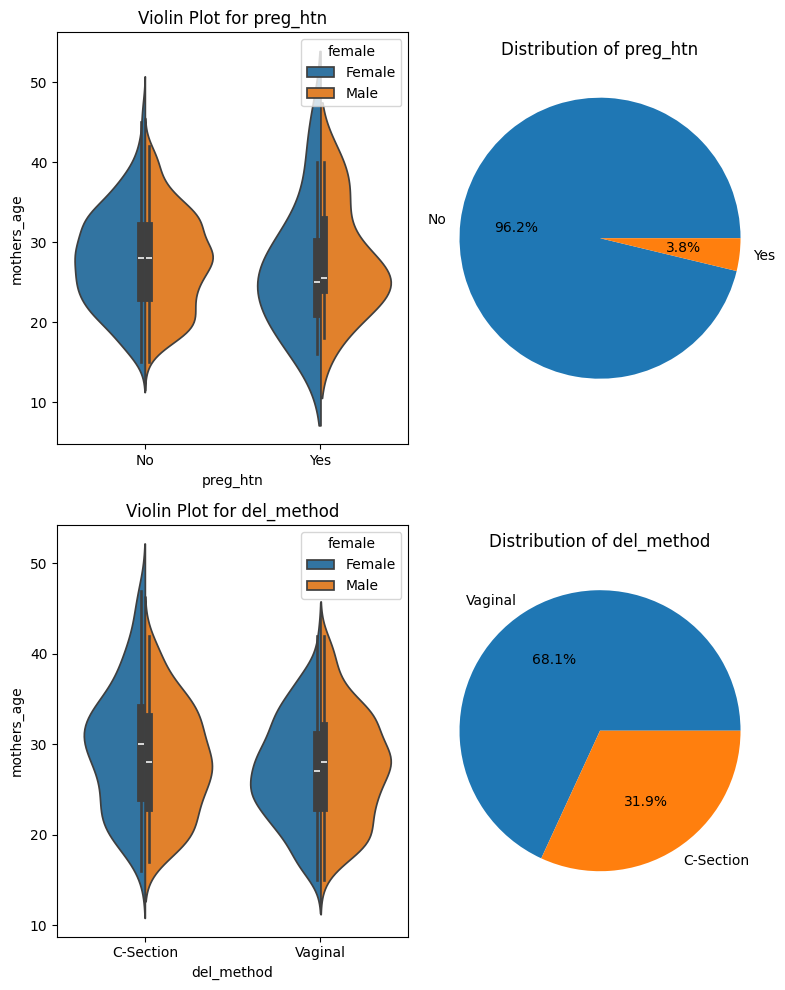

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical variables to visualize
categorical_vars = ['preg_htn', 'del_method']

# Create a figure and axes
fig, axes = plt.subplots(len(categorical_vars), 2, figsize=(8, 10))

# Iterate over categorical variables and create subplots
for i, var in enumerate(categorical_vars):
    # Violin plot
    sns.violinplot(x=var, y='mothers_age', hue='female', split=True, data=data_cleaned, ax=axes[i, 0])
    axes[i, 0].set_title(f'Violin Plot for {var}')

    # Pie chart
    counts = data_cleaned[var].value_counts()
    labels = counts.index
    sizes = counts.values
    axes[i, 1].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i, 1].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

Looks like both the categorical variables follow good distributions with respect to baby gender.

NORMALITY TEST:

Normality Test for mothers_age
Statistics=24.146, p=0.000
Sample does not look Gaussian (reject H0)


Normality Test for wt_gain
Statistics=50.477, p=0.000
Sample does not look Gaussian (reject H0)


Normality Test for gest_age
Statistics=367.985, p=0.000
Sample does not look Gaussian (reject H0)


Normality Test for birth_wt
Statistics=166.999, p=0.000
Sample does not look Gaussian (reject H0)




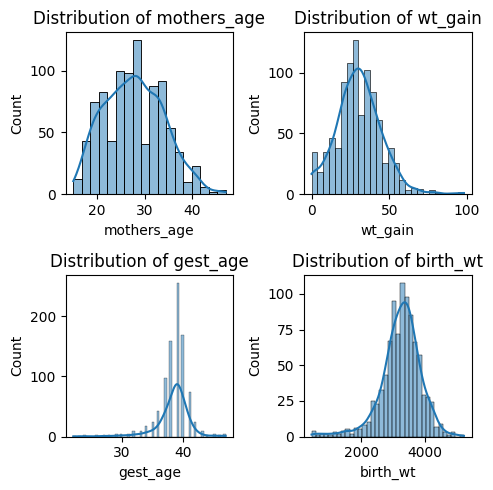

In [28]:
from scipy.stats import normaltest


# Numerical columns to analyze
numerical_columns = ['mothers_age', 'wt_gain', 'gest_age', 'birth_wt']

# Check for normality using Shapiro-Wilk test
for column in numerical_columns:
    stat, p = normaltest(data_cleaned[column])
    print(f"Normality Test for {column}")
    print(f"Statistics=%.3f, p=%.3f" % (stat, p))
    alpha = 0.05
    if p < alpha:
        print("Sample does not look Gaussian (reject H0)")
    else:
        print("Sample looks Gaussian (fail to reject H0)")
    print("\n")

# Visualize the distribution of numerical variables
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

for i, column in enumerate(numerical_columns):
    sns.histplot(data=data_cleaned, x=column, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

It is clear that the variables mothers_age, wt_gain, gest_age, and birth_wt do not follow a normal distribution, as indicated above, so we will treat them as non-parametric variables. This means we will employ non-parametric statistical methods.

<Figure size 1500x1000 with 0 Axes>

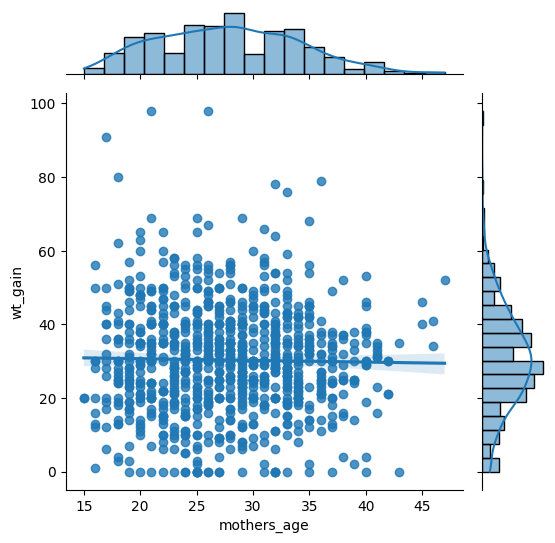

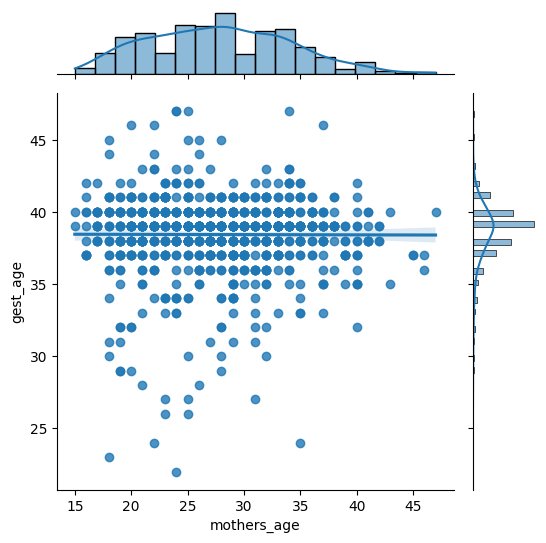

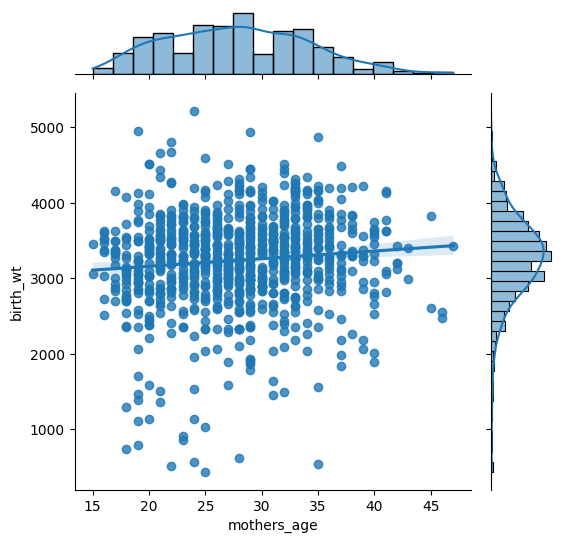

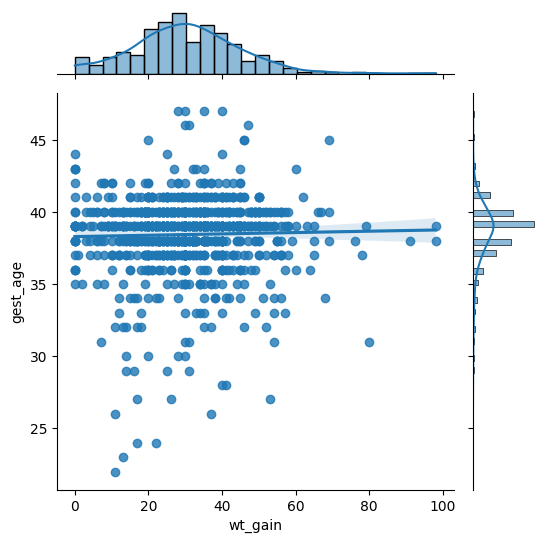

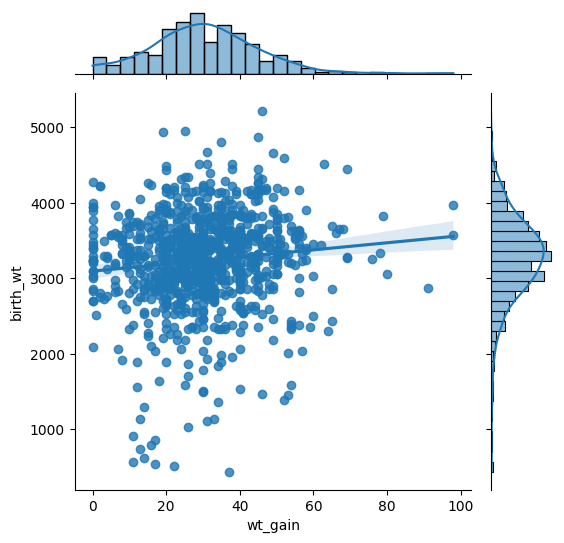

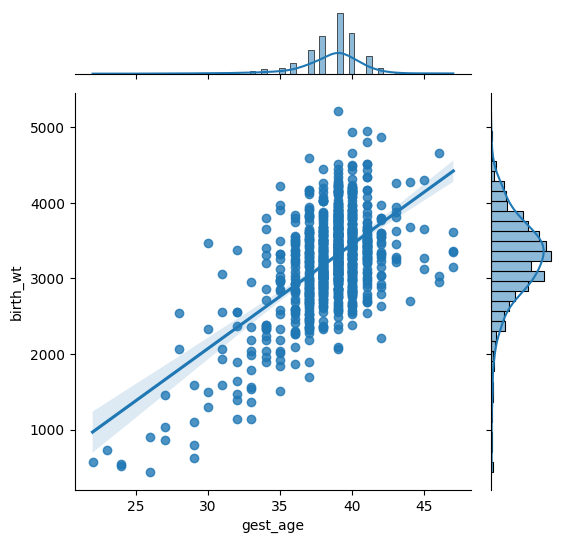

In [29]:
# Create a figure for better layout
plt.figure(figsize=(15, 10))

# Iterate over pairs of numerical columns
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i >= j:  # Avoid duplicate plots (upper triangle)
            continue
        # Create a joint plot with regression line (kind="regg")
        # Pass data as a keyword argument and x, y as column names
        sns.jointplot(x=col1, y=col2, data=data_cleaned, kind="reg")
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)  # Adjust spacing
        plt.show()  # Display each plot individually

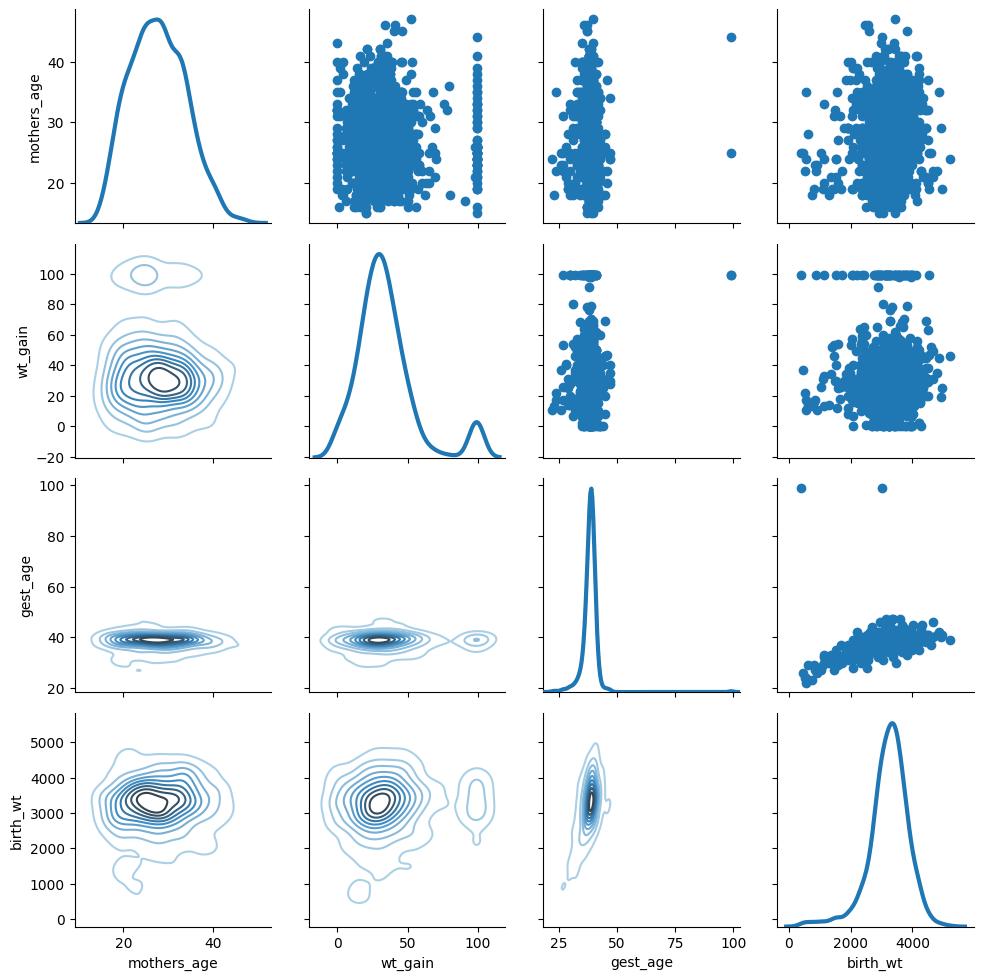

In [30]:
#PAIR GRID
# Define numerical columns for the pair grid
numerical_columns = ['mothers_age', 'wt_gain', 'gest_age', 'birth_wt']

# Create a pair grid with non-parametric density plots and scatter plots
g = sns.PairGrid(data, vars=numerical_columns, diag_sharey=False)

# Lower triangle: Non-parametric density plots
g.map_lower(sns.kdeplot, cmap="Blues_d")  # Customize colormap as desired

# Upper triangle: Scatter plots
g.map_upper(plt.scatter)

# Diagonal: Non-parametric density plots with thicker line
g.map_diag(sns.kdeplot, lw=3)  # Set line width for diagonal plots

plt.show()

There is a clear indication about the positive association between Gest_age variable and birth_wt variable.

Also, there is a possibility having positive association between birth_wt variable and wt_gain variable.

There is no significant association between Gest_age variable and mothers_age, wt_gain variables.

<Axes: >

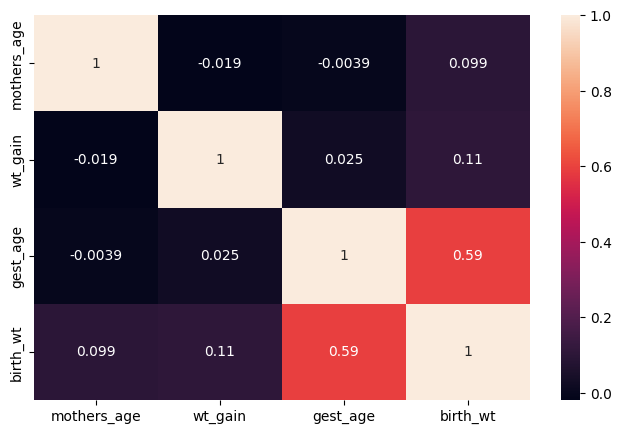

In [31]:
plt.figure(figsize = (8,5))

sns.heatmap(numerical_data.corr(),annot = True)

 Analyzing the Correlation Matrix

- **Maternal Age and Birth Weight:** Older mothers tend to have slightly heavier babies, possibly due to factors like increased maternal weight or better overall health.
- **Weight Gain and Birth Weight:** Increased weight gain during pregnancy is associated with higher birth weight.
- **Gestational Age and Birth Weight:** Longer gestational age is strongly associated with higher birth weight.


# RESEARCH QUESTIONS

# 1. Does a longer pregnancy duration lead to heavier babies, and does this relationship vary by maternal age and hypertension status?



<Figure size 1000x600 with 0 Axes>

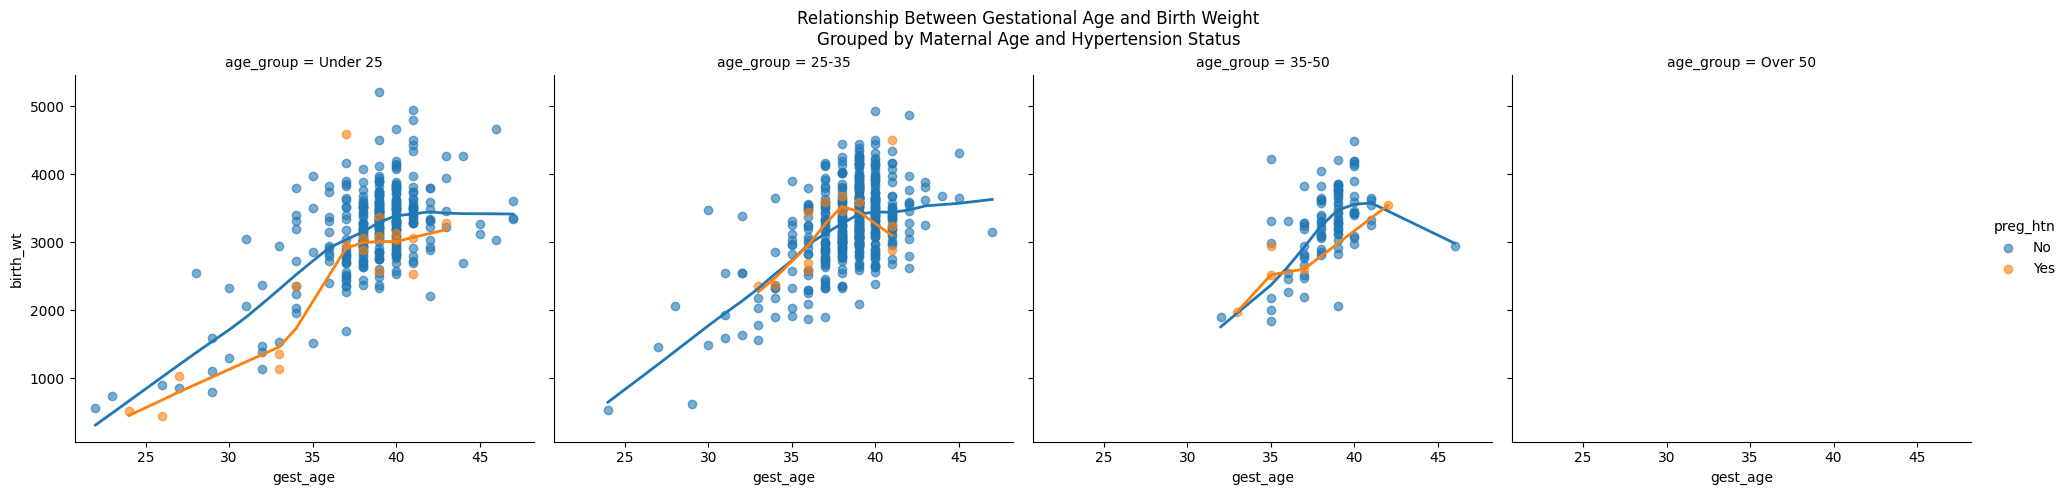

In [32]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create age groups
data_cleaned['age_group'] = pd.cut(data_cleaned['mothers_age'], bins=[0, 25, 35, 50, 100], labels=['Under 25', '25-35', '35-50', 'Over 50'])

plt.figure(figsize = (10,6))
# Visualize the relationship using scatterplots with LOESS smoothing
sns.lmplot(
    data=data_cleaned,
    x='gest_age',
    y='birth_wt',
    hue='preg_htn',
    col='age_group',
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.6},
    line_kws={'lw': 2},
    lowess=True
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between Gestational Age and Birth Weight\nGrouped by Maternal Age and Hypertension Status')
plt.show()

A longer pregnancy duration generally leads to heavier babies.

Statistical Method to be used:


    * Kruskal-Wallis test (non-parametric)

    - One-way ANOVA (parametric) (for continuous outcomes with equal variances).


In [ ]:
#pip install scikit_posthocs

In [37]:
from scipy.stats import kruskal, spearmanr
from scikit_posthocs import posthoc_dunn

In [38]:
# Statistical analysis: Kruskal-Wallis Test for non-parametric comparison
print("Kruskal-Wallis Test Results:")
for age_group in data_cleaned['age_group'].unique():
    group_data = data_cleaned[data_cleaned['age_group'] == age_group]
    stat, p = kruskal(
        group_data[group_data['preg_htn'] == 'Yes']['birth_wt'],
        group_data[group_data['preg_htn'] == 'No']['birth_wt']
    )
    print(f"Age Group: {age_group}, H-statistic: {stat:.3f}, p-value: {p:.3f}")

Kruskal-Wallis Test Results:
Age Group: Under 25, H-statistic: 11.252, p-value: 0.001
Age Group: 25-35, H-statistic: 0.337, p-value: 0.562
Age Group: 35-50, H-statistic: 4.336, p-value: 0.037



# Under 25:

H-statistic: 11.252, p-value: 0.001
There is a statistically significant difference in birth weights between hypertensive and non-hypertensive mothers in this age group.

# Between 25-35:

H-statistic: 0.337, p-value: 0.562
No significant difference in birth weights is observed between hypertensive and non-hypertensive mothers in this age group.

# Between 35-50:

H-statistic: 4.336, p-value: 0.037
A significant difference exists, but it is less pronounced compared to the Under 25 group.


 Yes, longer pregnancies generally result in heavier babies, but this relationship changes based on the mother’s age and whether she has hypertension.

# 2. Does the way a baby is born (vaginally or by C-section) affect its birth weight, considering factors like how much weight the mother gained during pregnancy and whether she had high blood pressure?

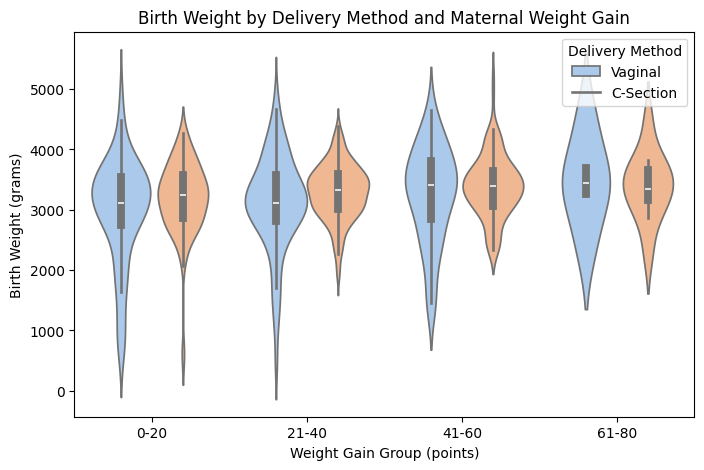

In [39]:
# Create categories for weight gain
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80',]
data_cleaned['wt_gain_group'] = pd.cut(data_cleaned['wt_gain'], bins=bins, labels=labels, include_lowest=True)

# Visualize the relationship between delivery method and birth weight under varying weight gain and hypertension
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=data_cleaned,
    x='wt_gain_group',
    y='birth_wt',
    hue='del_method',
    palette='pastel'
)
plt.title('Birth Weight by Delivery Method and Maternal Weight Gain')
plt.xlabel('Weight Gain Group (points)')
plt.ylabel('Birth Weight (grams)')
plt.legend(title='Delivery Method', labels=['Vaginal', 'C-Section'])
plt.show()

In [40]:
# Statistical analysis: Kruskal-Wallis Test for non-parametric comparison within each group
print("Kruskal-Wallis Test Results:")
for wt_group in data_cleaned['wt_gain_group'].unique():
    group_data = data_cleaned[data_cleaned['wt_gain_group'] == wt_group]
    for htn_status in group_data['preg_htn'].unique():
        htn_data = group_data[group_data['preg_htn'] == htn_status]
        stat, p = kruskal(
            htn_data[htn_data['del_method'] == 'Vaginal']['birth_wt'],
            htn_data[htn_data['del_method'] == 'C-Section']['birth_wt']
        )
        print(f"Weight Gain Group: {wt_group}, Hypertension: {htn_status}, H-statistic: {stat:.3f}, p-value: {p:.3f}")


Kruskal-Wallis Test Results:
Weight Gain Group: 0-20, Hypertension: No, H-statistic: 1.990, p-value: 0.158
Weight Gain Group: 0-20, Hypertension: Yes, H-statistic: 0.011, p-value: 0.917
Weight Gain Group: 21-40, Hypertension: No, H-statistic: 3.935, p-value: 0.047
Weight Gain Group: 21-40, Hypertension: Yes, H-statistic: 3.050, p-value: 0.081
Weight Gain Group: 41-60, Hypertension: No, H-statistic: 0.236, p-value: 0.627
Weight Gain Group: 41-60, Hypertension: Yes, H-statistic: 0.060, p-value: 0.806
Weight Gain Group: 61-80, Hypertension: No, H-statistic: 0.080, p-value: 0.777


For all the mothers who do not have hypertension and belong to '21-40' weight gain group, the delivery method has a significant impact on birth weight.

# 3. Does pregnancy-associated hypertension (preg_htn) cause a reduction in birth weight (birth_wt)?

In [41]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: with hypertension (preg_htn == 1) and without hypertension (preg_htn == 2)
hypertension_group = data_cleaned[data_cleaned['preg_htn'] == 'Yes']['birth_wt']
no_hypertension_group = data_cleaned[data_cleaned['preg_htn'] == 'No']['birth_wt']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(hypertension_group, no_hypertension_group)

print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")


T-statistic: 10082.0
P-value: 0.0003256152643282289


There is a statistically significant difference in birth weight between women with and without pregnancy-associated hypertension. This suggests that pregnancy-associated hypertension may be associated with a reduction in birth weight.

# 4. What are the primary risk factors associated with preterm birth in this population?

In [42]:
# Create a binary variable for preterm birth: 1 = Preterm (gest_age < 37), 0 = Full term
data_cleaned['preterm'] = np.where(data_cleaned['gest_age'] < 37, 1, 0)

# Descriptive statistics for the dataset
print(data_cleaned.describe())

# 1. Mann-Whitney U Test for Maternal Age vs Preterm Birth
preterm_age = data_cleaned[data_cleaned['preterm'] == 1]['mothers_age']
fullterm_age = data_cleaned[data_cleaned['preterm'] == 0]['mothers_age']

# Perform the Mann-Whitney U test for maternal age
stat_age, p_val_age = mannwhitneyu(preterm_age, fullterm_age)

# 2. Mann-Whitney U Test for Weight Gain vs Preterm Birth
preterm_wt_gain = data_cleaned[data_cleaned['preterm'] == 1]['wt_gain']
fullterm_wt_gain = data_cleaned[data_cleaned['preterm'] == 0]['wt_gain']

# Perform the Mann-Whitney U test for weight gain
stat_wt_gain, p_val_wt_gain = mannwhitneyu(preterm_wt_gain, fullterm_wt_gain)

# 3. Mann-Whitney U Test for Pregnancy-associated Hypertension vs Preterm Birth
# Convert `preg_htn` (1: Yes, 2: No) to binary 0 and 1
preg_htn_yes = data_cleaned[data_cleaned['preterm'] == 1].loc[data_cleaned['preg_htn'] == 'Yes', 'birth_wt']
preg_htn_no = data_cleaned[data_cleaned['preterm'] == 1].loc[data_cleaned['preg_htn'] == 'No', 'birth_wt']

# Perform Mann-Whitney U test for pregnancy-associated hypertension and birth weight for preterm births
stat_htn, p_val_htn = mannwhitneyu(preg_htn_yes, preg_htn_no)

# 4. Mann-Whitney U Test for Delivery Method vs Preterm Birth
del_method_vaginal = data_cleaned[(data_cleaned['preterm'] == 1) & (data_cleaned['del_method'] == 'Vaginal')]['birth_wt']
del_method_csection = data_cleaned[(data_cleaned['preterm'] == 1) & (data_cleaned['del_method'] == 'C-Section')]['birth_wt']

# Perform Mann-Whitney U test for delivery method and birth weight for preterm births
stat_del_method, p_val_del_method = mannwhitneyu(del_method_vaginal, del_method_csection)

# 5. Mann-Whitney U Test for Baby Gender vs Preterm Birth
# Split the dataset by baby gender and preterm birth
preterm_male = data_cleaned[(data_cleaned['preterm'] == 1) & (data_cleaned['female'] == 'Male')]['birth_wt']
preterm_female = data_cleaned[(data_cleaned['preterm'] == 1) & (data_cleaned['female'] == 'Female')]['birth_wt']

# Perform the Mann-Whitney U test for baby gender (Male vs Female) and preterm birth
stat_gender, p_val_gender = mannwhitneyu(preterm_male, preterm_female)
# Output the results with proper formatting
print(f"\nMann-Whitney U Test Results:\n")

print(f"1. Maternal Age vs Preterm Birth:")
print(f"   U-stat = {stat_age}, p-value = {p_val_age}\n")

print(f"2. Weight Gain vs Preterm Birth:")
print(f"   U-stat = {stat_wt_gain}, p-value = {p_val_wt_gain}\n")

print(f"3. Pregnancy-associated Hypertension vs Preterm Birth:")
print(f"   U-stat = {stat_htn}, p-value = {p_val_htn}\n")

print(f"4. Delivery Method vs Preterm Birth:")
print(f"   U-stat = {stat_del_method}, p-value = {p_val_del_method}\n")

print(f"5. Baby Gender vs Preterm Birth:")
print(f"   U-stat = {stat_gender}, p-value = {p_val_gender}\n")

# Interpret the p-values with better organization
alpha = 0.05  # Significance level


       mothers_age     wt_gain    gest_age     birth_wt     preterm
count   932.000000  932.000000  932.000000   932.000000  932.000000
mean     27.757511   30.298283   38.424893  3236.893777    0.137339
std       6.169395   14.494307    2.696965   630.256745    0.344390
min      15.000000    0.000000   22.000000   443.000000    0.000000
25%      23.000000   21.000000   38.000000  2938.000000    0.000000
50%      28.000000   30.000000   39.000000  3289.500000    0.000000
75%      32.000000   40.000000   40.000000  3600.000000    0.000000
max      47.000000   98.000000   47.000000  5216.000000    1.000000

Mann-Whitney U Test Results:

1. Maternal Age vs Preterm Birth:
   U-stat = 51696.5, p-value = 0.9323070181805775

2. Weight Gain vs Preterm Birth:
   U-stat = 51766.5, p-value = 0.9126942582620095

3. Pregnancy-associated Hypertension vs Preterm Birth:
   U-stat = 544.0, p-value = 0.05294076937428015

4. Delivery Method vs Preterm Birth:
   U-stat = 3055.0, p-value = 9.38583590859514

Pregnancy-associated hypertension might have a small association with preterm birth, but it is not statistically significant at the 0.05 level.


Delivery method is significantly associated with preterm birth. This suggests that the method of delivery (vaginal or c-section) plays a role in whether a birth is preterm or not.


**IMPORTANT NOTE** : (This is my logical interpretation) Preterm birth itself is likely to influence the delivery method, rather than the delivery method directly affecting whether a birth is preterm or not.
Preterm birth (gestational age < 37 weeks) often requires medical intervention, which may lead to a higher likelihood of a c-section. This is because preterm babies are at higher risk of complications, such as respiratory distress, and c-sections are sometimes performed to avoid further complications during delivery.

On the other hand, full-term pregnancies (gestational age ≥ 37 weeks) are more likely to have vaginal deliveries, assuming there are no complications.



# 5. Can deviations in weight gain per week during pregnancy signal an increased likelihood of high-risk pregnancies or delivery complications?

 Feature engineering before analysis

In [112]:
# Age Groups
data_cleaned['age_group'] = pd.cut(data_cleaned['mothers_age'], bins=[0, 19, 25, 35, 50], labels=['Teen', 'Young Adult', 'Middle Age', 'Older'])

# High-Risk Pregnancy
data_cleaned['high_risk_pregnancy'] = np.where(
    (data_cleaned['preg_htn'] == 1) |
    (data_cleaned['wt_gain'] > 40) |
    (data_cleaned['mothers_age'] < 18) |
    (data_cleaned['mothers_age'] > 40), 1, 0
)

# Weight Gain per Week
data_cleaned['wt_gain_per_week'] = data_cleaned['wt_gain'] / data_cleaned['gest_age']


In [116]:
# Step 1: Calculate mean and standard deviation of weight gain per week
mean_wt_gain_per_week = data_cleaned['wt_gain_per_week'].mean()
std_wt_gain_per_week = data_cleaned['wt_gain_per_week'].std()

# Define deviations: significantly above or below average
upper_threshold = mean_wt_gain_per_week + std_wt_gain_per_week
lower_threshold = mean_wt_gain_per_week - std_wt_gain_per_week

def classify_deviation(value):
    if value > upper_threshold:
        return 'Above Average'
    elif value < lower_threshold:
        return 'Below Average'
    else:
        return 'Within Average'

# Step 2: Create a new feature for weight gain deviation
data_cleaned['wt_gain_deviation'] = data_cleaned['wt_gain_per_week'].apply(classify_deviation)

# Step 3: Analyze relationship with high-risk pregnancy
high_risk = data_cleaned[data_cleaned['high_risk_pregnancy'] == 1]
low_risk = data_cleaned[data_cleaned['high_risk_pregnancy'] == 0]

# Proportion of high-risk pregnancies in each deviation category
deviation_high_risk = high_risk['wt_gain_deviation'].value_counts(normalize=True)
deviation_low_risk = low_risk['wt_gain_deviation'].value_counts(normalize=True)

# Proportion of high-risk pregnancies in each deviation category
deviation_high_risk_without_normalizing = high_risk['wt_gain_deviation'].value_counts()
deviation_low_risk_without_normalizing = low_risk['wt_gain_deviation'].value_counts()

print(deviation_high_risk_without_normalizing)
print(deviation_low_risk_without_normalizing)

# Step 4: Mann-Whitney U Test for weight gain deviations and high-risk pregnancy
above_avg_wt_gain = data_cleaned[data_cleaned['wt_gain_deviation'] == 'Above Average']['high_risk_pregnancy']
below_avg_wt_gain = data_cleaned[data_cleaned['wt_gain_deviation'] == 'Below Average']['high_risk_pregnancy']
print('\n')

stat, p_value = mannwhitneyu(above_avg_wt_gain, below_avg_wt_gain)

print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

wt_gain_deviation
Above Average     127
Within Average     97
Below Average       7
Name: count, dtype: int64
wt_gain_deviation
Within Average    579
Below Average     119
Above Average       3
Name: count, dtype: int64


T-statistic: 15736.0
P-value: 4.358458203053165e-49


The extremely large t-statistic (15736.0) and the extremely small p-value (4.358458203053165e-49) strongly suggest a significant association between deviations in weight gain per week during pregnancy and an increased likelihood of high-risk pregnancies or delivery complications.